<a href="https://colab.research.google.com/github/AKHILM20DS007/AKHILM20DS007/blob/main/Copy_of_1st_Mar_Titanic_Passenger_Survival_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
from cvzone.FaceDetectionModule import FaceDetector
import cv2
def face_extracter(img):
    detector = FaceDetector()
    myimg, data = detector.findFaces(img)
    if data:
        x,y,w,h = data[0]['bbox']
        global face
        face = img[y:y+h,x:x+w]
    else:
        return None
    return face
 
def collect_samples(id):
    count = 0
    cam = cv2.VideoCapture(0)
    while True:
        ret, img = cam.read()
        if ret == True:
            if face_extracter(img) is not None:
                count = count+1
                new_img = cv2.resize(face_extracter(img),(300,300))
                file_name = "samples/"+str(id)+"/user"+str(count)+".jpg"
                cv2.imwrite(file_name,new_img)
                cv2.imshow("Samples",img)
            else:
                print("Face Not Found")
                pass
            if cv2.waitKey(1) == ord('q') or count == 100:
                break
    cam.release()
    cv2.destroyAllWindows()
    print("Samples Collected")

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import seaborn as sns

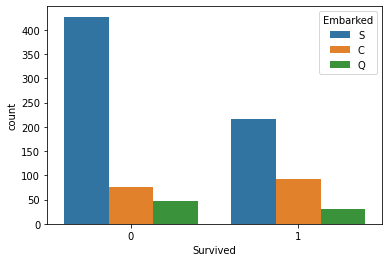

In [ ]:
sns.countplot(x='Survived',data=data,hue="Embarked");

In [ ]:
cols = ['PassengerId','Name','Ticket','Cabin']
data = data.drop(cols,axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
mean_age = data['Age'].mean()
mean_age = round(mean_age,2)
mean_age

29.7

In [ ]:
data['Age'] = data['Age'].fillna(mean_age)

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.shape

(889, 8)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.653622,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968367,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.700000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-2.437745e-16,4.395934e-17,-5.994455e-17,-3.197043e-17,-4.795564e-17,1.398706e-16,5.295102e-17
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-1.572211e+00,-1.359911e+00,-2.255494e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01,-1.939555e+00
25%,-3.735013e-01,-1.359911e+00,-5.905085e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01,-6.763575e-01
50%,8.252086e-01,7.353420e-01,3.578250e-03,-4.751991e-01,-4.743259e-01,-3.551972e-01,5.868396e-01
75%,8.252086e-01,7.353420e-01,4.124951e-01,4.313502e-01,-4.743259e-01,-2.207954e-02,5.868396e-01
max,8.252086e-01,7.353420e-01,3.884430e+00,6.777195e+00,6.967010e+00,9.668551e+00,5.868396e-01


In [ ]:
### split into train and test

In [ ]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85,random_state=3)

In [ ]:
ytrain.value_counts()

0    467
1    288
Name: Survived, dtype: int64

In [ ]:
0.85 *549

466.65

In [ ]:
### Build the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred = model.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

In [ ]:
ytest.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
### Confusion Matrix

In [ ]:
from sklearn.metrics import *
cm = confusion_matrix(ytest,ypred)
cm

array([[72, 10],
       [24, 28]])

In [ ]:
28/(24+28)

0.5384615384615384

In [ ]:
ac = accuracy_score(ytest,ypred)
ac

0.746268656716418

In [ ]:
1 - ac

0.25373134328358204

In [ ]:
precision_score(ytest,ypred)

0.7368421052631579

In [ ]:
recall_score(ytest,ypred)

0.5384615384615384

In [ ]:
f1_score(ytest,ypred)

0.6222222222222222

In [ ]:
cm.shape

(2, 2)

In [ ]:
len(cm)

2

In [ ]:
cm[len(cm)-1,len(cm)-1]

28

In [ ]:
cm[len(cm)-1,len(cm)-2]

24

In [ ]:
def ps(yt,yp):
  cm = confusion_matrix(yt,yp)
  tp = cm[len(cm)-1,len(cm)-1]
  fp = cm[len(cm)-1,len(cm)-2]
  ps = tp / (fp + tp)
  return ps

In [ ]:
ps(ytest,ypred)

0.5384615384615384

In [ ]:
### ROC CURVE

In [ ]:
xtest

array([[-1.57221121e+00, -1.35991138e+00, -8.99124923e-01,
        -4.75199081e-01,  2.00611934e+00,  9.57393893e-01,
         5.86839577e-01],
       [-1.57221121e+00,  7.35342031e-01,  1.26119036e+00,
         4.31350239e-01, -4.74325852e-01,  5.85435584e-01,
         5.86839577e-01],
       [ 8.25208629e-01,  7.35342031e-01,  3.57825001e-03,
        -4.75199081e-01, -4.74325852e-01, -4.71801802e-01,
         5.86839577e-01],
       [ 8.25208629e-01, -1.35991138e+00,  3.57825001e-03,
        -4.75199081e-01, -4.74325852e-01, -4.90424884e-01,
        -6.76357478e-01],
       [-1.57221121e+00,  7.35342031e-01,  1.03878603e-01,
         4.31350239e-01, -4.74325852e-01,  5.01380052e-01,
         5.86839577e-01],
       [ 8.25208629e-01,  7.35342031e-01,  3.57825001e-03,
        -4.75199081e-01, -4.74325852e-01, -4.87237820e-01,
         5.86839577e-01],
       [-3.73501291e-01,  7.35342031e-01,  1.56980683e+00,
        -4.75199081e-01, -4.74325852e-01, -3.84474648e-01,
         5.8683957

In [ ]:
ypred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

In [ ]:
ypred_new = model.predict_proba(xtest)[:,1]
ypred_new

array([0.95730426, 0.27426655, 0.07704325, 0.63310284, 0.41039718,
       0.07693244, 0.10884925, 0.07051684, 0.95347916, 0.22317469,
       0.00465011, 0.08521487, 0.96428311, 0.19746597, 0.85084421,
       0.06800494, 0.60867516, 0.31334342, 0.04304089, 0.40286096,
       0.82691083, 0.73074769, 0.30776312, 0.09567798, 0.10661391,
       0.63310874, 0.4955013 , 0.32806645, 0.30827788, 0.05841566,
       0.71695777, 0.89220546, 0.63312646, 0.2918438 , 0.06346656,
       0.03008564, 0.2129094 , 0.47975054, 0.06694911, 0.06506196,
       0.27851343, 0.07693244, 0.12358425, 0.17804229, 0.59146034,
       0.63316978, 0.71624094, 0.03974947, 0.13705593, 0.10279205,
       0.07044911, 0.57592087, 0.93418779, 0.81153605, 0.07045854,
       0.63316978, 0.62559074, 0.13204858, 0.59627825, 0.11033256,
       0.10650742, 0.0952638 , 0.50056603, 0.11078306, 0.06935426,
       0.22499954, 0.11313594, 0.07720911, 0.11441981, 0.09056123,
       0.1147572 , 0.07464128, 0.44889851, 0.78229552, 0.43767

In [ ]:
a = np.where(ypred_new >=0.2,1,0)
a

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1])

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(ytest,ypred_new)
df = pd.DataFrame()
df['FPR'] = fpr
df['TPR'] = tpr
df['Thresholds'] = thresholds
df

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.969502
1,0.000000,0.019231,0.969502
2,0.000000,0.230769,0.809247
3,0.012195,0.230769,0.789892
4,0.012195,0.250000,0.782296
5,0.024390,0.250000,0.768066
6,0.024390,0.269231,0.752339
7,0.036585,0.269231,0.736248
8,0.036585,0.346154,0.716241
9,0.048780,0.346154,0.697166


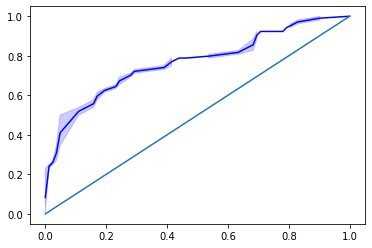

In [ ]:
sns.lineplot(x=fpr,y=tpr,color='blue');
sns.lineplot(x=[0,1],y=[0,1]);